In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import scipy.stats as stats
import seaborn as sns
# import multiprocessing

sns.set(style='ticks', color_codes = True)

# Input

In [2]:
songfeat = pd.read_csv('TicketArtist_SpotifySongFeatures.csv', sep=",")

In [3]:
songfeat

,Unnamed: 0,album,track_number,id,name,uri,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,0,25 Aniversario,5,57Xr3djWEaxOJE83T15OJs,La Negra Tomasa - Versión Radio,spotify:track:57Xr3djWEaxOJE83T15OJs,2013-03-26,0.56500,0.680,0.623,0.015100,0.2150,-8.131,0.0331,87.297,0.8020,29,Caifanes
1,1,De Caifanes A Jaguares,1,2Xjdd0Yx0kdEim8BJmmfTZ,Tu Me Liberas,spotify:track:2Xjdd0Yx0kdEim8BJmmfTZ,2008-04-22,0.01110,0.625,0.840,0.000156,0.1370,-6.712,0.0352,137.957,0.5850,18,Caifanes
2,2,De Caifanes A Jaguares,2,2f3NHh3sf6l2RcdxZCmQt6,Como Tu,spotify:track:2f3NHh3sf6l2RcdxZCmQt6,2008-04-22,0.12200,0.650,0.816,0.000029,0.3580,-6.900,0.0283,128.125,0.8550,27,Caifanes
3,3,De Caifanes A Jaguares,3,1rgvcNtGV0BzYD69h75Qz5,La Celula Que Explota,spotify:track:1rgvcNtGV0BzYD69h75Qz5,2008-04-22,0.43200,0.411,0.683,0.000054,0.3840,-5.037,0.0399,122.917,0.2560,28,Caifanes
4,4,De Caifanes A Jaguares,4,5UWzZ8Ws7AXl35KY2TtNvC,Te Lo Pido por Favor,spotify:track:5UWzZ8Ws7AXl35KY2TtNvC,2008-04-22,0.10700,0.651,0.669,0.000422,0.1270,-6.336,0.0257,106.180,0.4970,30,Caifanes
5,5,De Caifanes A Jaguares,6,7lf0vuPK9NvSGx16DOo8Q2,Matenme Porque Me Muero,spotify:track:7lf0vuPK9NvSGx16DOo8Q2,2008-04-22,0.82700,0.309,0.276,0.000563,0.1150,-8.647,0.0306,105.669,0.3150,21,Caifanes
6,6,De Caifanes A Jaguares,7,2FYzwDj6gyuivKOBb2M4bz,Avientame,spotify:track:2FYzwDj6gyuivKOBb2M4bz,2008-04-22,0.00438,0.565,0.978,0.000351,0.0422,-4.517,0.0553,130.099,0.5450,20,Caifanes
7,7,De Caifanes A Jaguares,9,43mK7BgQvil9RsEjtzwU3O,No Dejes Que,spotify:track:43mK7BgQvil9RsEjtzwU3O,2008-04-22,0.19400,0.555,0.710,0.000004,0.1110,-5.467,0.0271,124.091,0.2890,24,Caifanes
8,8,De Caifanes A Jaguares,10,61OFcRz9ODjwrj5qRqbIDR,El Milagro,spotify:track:61OFcRz9ODjwrj5qRqbIDR,2008-04-22,0.01930,0.463,0.861,0.000005,0.1380,-5.381,0.0327,167.989,0.2730,19,Caifanes
9,9,De Caifanes A Jaguares,12,1tel7hPrPKiMPE2tGeJiM1,Antes De Que Nos Olviden,spotify:track:1tel7hPrPKiMPE2tGeJiM1,2008-04-22,0.49000,0.640,0.736,0.030100,0.1170,-7.288,0.0309,104.017,0.2390,18,Caifanes


In [4]:
songfeat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643457 entries, 0 to 643456
Data columns (total 18 columns):
Unnamed: 0          643457 non-null int64
album               643457 non-null object
track_number        643457 non-null int64
id                  643457 non-null object
name                643457 non-null object
uri                 643457 non-null object
release_date        643457 non-null object
acousticness        642349 non-null float64
danceability        642349 non-null float64
energy              642349 non-null float64
instrumentalness    642349 non-null float64
liveness            642349 non-null float64
loudness            642349 non-null float64
speechiness         642349 non-null float64
tempo               642349 non-null float64
valence             642348 non-null float64
popularity          643457 non-null int64
artist              643457 non-null object
dtypes: float64(9), int64(3), object(6)
memory usage: 88.4+ MB


In [5]:
songfeat.index.nbytes + songfeat.columns.nbytes + songfeat.values.nbytes

92658032

In [6]:
songfeat.drop(songfeat.columns[0], axis=1, inplace=True)
songfeat

,album,track_number,id,name,uri,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,25 Aniversario,5,57Xr3djWEaxOJE83T15OJs,La Negra Tomasa - Versión Radio,spotify:track:57Xr3djWEaxOJE83T15OJs,2013-03-26,0.56500,0.680,0.623,0.015100,0.2150,-8.131,0.0331,87.297,0.8020,29,Caifanes
1,De Caifanes A Jaguares,1,2Xjdd0Yx0kdEim8BJmmfTZ,Tu Me Liberas,spotify:track:2Xjdd0Yx0kdEim8BJmmfTZ,2008-04-22,0.01110,0.625,0.840,0.000156,0.1370,-6.712,0.0352,137.957,0.5850,18,Caifanes
2,De Caifanes A Jaguares,2,2f3NHh3sf6l2RcdxZCmQt6,Como Tu,spotify:track:2f3NHh3sf6l2RcdxZCmQt6,2008-04-22,0.12200,0.650,0.816,0.000029,0.3580,-6.900,0.0283,128.125,0.8550,27,Caifanes
3,De Caifanes A Jaguares,3,1rgvcNtGV0BzYD69h75Qz5,La Celula Que Explota,spotify:track:1rgvcNtGV0BzYD69h75Qz5,2008-04-22,0.43200,0.411,0.683,0.000054,0.3840,-5.037,0.0399,122.917,0.2560,28,Caifanes
4,De Caifanes A Jaguares,4,5UWzZ8Ws7AXl35KY2TtNvC,Te Lo Pido por Favor,spotify:track:5UWzZ8Ws7AXl35KY2TtNvC,2008-04-22,0.10700,0.651,0.669,0.000422,0.1270,-6.336,0.0257,106.180,0.4970,30,Caifanes
5,De Caifanes A Jaguares,6,7lf0vuPK9NvSGx16DOo8Q2,Matenme Porque Me Muero,spotify:track:7lf0vuPK9NvSGx16DOo8Q2,2008-04-22,0.82700,0.309,0.276,0.000563,0.1150,-8.647,0.0306,105.669,0.3150,21,Caifanes
6,De Caifanes A Jaguares,7,2FYzwDj6gyuivKOBb2M4bz,Avientame,spotify:track:2FYzwDj6gyuivKOBb2M4bz,2008-04-22,0.00438,0.565,0.978,0.000351,0.0422,-4.517,0.0553,130.099,0.5450,20,Caifanes
7,De Caifanes A Jaguares,9,43mK7BgQvil9RsEjtzwU3O,No Dejes Que,spotify:track:43mK7BgQvil9RsEjtzwU3O,2008-04-22,0.19400,0.555,0.710,0.000004,0.1110,-5.467,0.0271,124.091,0.2890,24,Caifanes
8,De Caifanes A Jaguares,10,61OFcRz9ODjwrj5qRqbIDR,El Milagro,spotify:track:61OFcRz9ODjwrj5qRqbIDR,2008-04-22,0.01930,0.463,0.861,0.000005,0.1380,-5.381,0.0327,167.989,0.2730,19,Caifanes
9,De Caifanes A Jaguares,12,1tel7hPrPKiMPE2tGeJiM1,Antes De Que Nos Olviden,spotify:track:1tel7hPrPKiMPE2tGeJiM1,2008-04-22,0.49000,0.640,0.736,0.030100,0.1170,-7.288,0.0309,104.017,0.2390,18,Caifanes


In [7]:
songfeat.head()

,album,track_number,id,name,uri,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,25 Aniversario,5,57Xr3djWEaxOJE83T15OJs,La Negra Tomasa - Versión Radio,spotify:track:57Xr3djWEaxOJE83T15OJs,2013-03-26,0.5650,0.680,0.623,0.015100,0.215,-8.131,0.0331,87.297,0.802,29,Caifanes
1,De Caifanes A Jaguares,1,2Xjdd0Yx0kdEim8BJmmfTZ,Tu Me Liberas,spotify:track:2Xjdd0Yx0kdEim8BJmmfTZ,2008-04-22,0.0111,0.625,0.840,0.000156,0.137,-6.712,0.0352,137.957,0.585,18,Caifanes
2,De Caifanes A Jaguares,2,2f3NHh3sf6l2RcdxZCmQt6,Como Tu,spotify:track:2f3NHh3sf6l2RcdxZCmQt6,2008-04-22,0.1220,0.650,0.816,0.000029,0.358,-6.900,0.0283,128.125,0.855,27,Caifanes
3,De Caifanes A Jaguares,3,1rgvcNtGV0BzYD69h75Qz5,La Celula Que Explota,spotify:track:1rgvcNtGV0BzYD69h75Qz5,2008-04-22,0.4320,0.411,0.683,0.000054,0.384,-5.037,0.0399,122.917,0.256,28,Caifanes
4,De Caifanes A Jaguares,4,5UWzZ8Ws7AXl35KY2TtNvC,Te Lo Pido por Favor,spotify:track:5UWzZ8Ws7AXl35KY2TtNvC,2008-04-22,0.1070,0.651,0.669,0.000422,0.127,-6.336,0.0257,106.180,0.497,30,Caifanes


# Examining NULLs

In [8]:
# Number of null values per column
for i in songfeat.columns:
    print(str(i) + " " + str(songfeat[i].isnull().sum()))

album 0
track_number 0
id 0
name 0
uri 0
release_date 0
acousticness 1108
danceability 1108
energy 1108
instrumentalness 1108
liveness 1108
loudness 1108
speechiness 1108
tempo 1108
valence 1109
popularity 0
artist 0


In [9]:
songfeat.shape

(643457, 17)

In [10]:
# Proportion of songs that are missing some measures
(1108/songfeat.shape[0])*100

0.17219487860105648

In [11]:
len(songfeat[songfeat['acousticness'].isnull()]['artist'].unique())
songfeat[songfeat['acousticness'].isnull()]['artist'].unique()

array(['Justin Moore', 'Koan Sound', 'Will Kimbrough', 'Russian Masters',
       'Brantley Gilbert', 'Mother Mother', 'Yarn', 'Tierra', 'JJ Grey',
       'Hollerado', 'Bach Project II', 'Telefon Tel Aviv',
       'The Darkside Project', "Gordon Goodwin's Big Phat Band",
       'Lauren Daigle', 'Sebastian Bach', 'Kenny Garrett',
       'John McCutcheon', 'Tobe Nwigwe', 'Corey Harris Band', 'Catch 22',
       'Micky Dolenz', 'Eliot Lipp', 'Ekali', 'MC Hammer',
       'Halloween 2019', 'Kinky Friedman', 'Josh A & Jake Hill',
       'Uptown Vibes', 'Country Christmas', 'Gabriel Kelley', 'Zhavia',
       'Alien Ant Farm', 'Morris Day', 'Banda MS', 'PULSE feat',
       'Music in the Garden', 'Gary Allan', 'Lalah Hathaway', 'Celeste',
       'La India', 'Lost Kings', 'Sound', 'Reagan Youth', 'Making Time',
       'Keke Palmer', 'The Cadillac Three', 'Dana Fuchs', 'Mr. Carmack',
       'Tasha Cobbs Leonard', 'The McCartney Years', 'MILKK',
       'Mark Knight', 'For King & Country', 'Rave On',

In [12]:
songfeat[(songfeat['artist'] == 'Charli XCX') & (songfeat['acousticness'].isnull())]

,album,track_number,id,name,uri,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
569168,Click (feat. Kim Petras and Slayyyter) [No Boy...,1,2xrk7zYN50RIF39J5wqCHw,Click (feat. Kim Petras and Slayyyter) [No Boy...,spotify:track:2xrk7zYN50RIF39J5wqCHw,2019-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,Charli XCX


In [13]:
# songfeat[(songfeat['artist'] == 'Tierra Whack') & (songfeat['acousticness'].isnull())]
songfeat[(songfeat['artist'] == 'Tierra Whack')]

,album,track_number,id,name,uri,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
461807,Whack World,1,50PvTiqi0cZne4mKR7HRck,Black Nails,spotify:track:50PvTiqi0cZne4mKR7HRck,2018-05-30,0.933000,0.689,0.289,0.000002,0.1040,-9.519,0.0932,131.238,0.3230,50,Tierra Whack
461808,Whack World,2,4lLdrM9fpLA1Pcng9WNMLp,Bugs Life,spotify:track:4lLdrM9fpLA1Pcng9WNMLp,2018-05-30,0.806000,0.554,0.155,0.145000,0.1050,-18.272,0.4690,151.290,0.3250,50,Tierra Whack
461809,Whack World,3,5Gnx5bNAglWcclJkuJnrys,Flea Market,spotify:track:5Gnx5bNAglWcclJkuJnrys,2018-05-30,0.838000,0.756,0.357,0.000014,0.1310,-6.298,0.0592,110.093,0.4940,58,Tierra Whack
461810,Whack World,4,3aLMgdQGyb5Dd7rMbKSynB,Cable Guy,spotify:track:3aLMgdQGyb5Dd7rMbKSynB,2018-05-30,0.332000,0.914,0.239,0.000413,0.1190,-8.597,0.1550,100.237,0.2580,54,Tierra Whack
461811,Whack World,5,43QHgtUoaHY7tRfhdCE4yn,4 Wings,spotify:track:43QHgtUoaHY7tRfhdCE4yn,2018-05-30,0.816000,0.659,0.333,0.000021,0.1140,-11.268,0.4300,79.365,0.6430,50,Tierra Whack
461812,Whack World,6,4kTkoT7mNXTJ21WwFTIDxA,Hookers,spotify:track:4kTkoT7mNXTJ21WwFTIDxA,2018-05-30,0.687000,0.702,0.499,0.000002,0.1590,-6.828,0.1510,167.079,0.2270,58,Tierra Whack
461813,Whack World,7,0WpDeBJ22LcwF4QoERQOTv,Hungry Hippo,spotify:track:0WpDeBJ22LcwF4QoERQOTv,2018-05-30,0.022700,0.894,0.610,0.007440,0.1020,-5.691,0.0487,136.640,0.7800,72,Tierra Whack
461814,Whack World,8,6pmoQSAU9y2EIz6ee2hBwc,Pet Cemetery,spotify:track:6pmoQSAU9y2EIz6ee2hBwc,2018-05-30,0.037700,0.819,0.318,0.000095,0.0471,-7.313,0.0423,179.972,0.9810,52,Tierra Whack
461815,Whack World,9,4iFgO0Rmg5hXcPpM3RpayS,Fuck Off,spotify:track:4iFgO0Rmg5hXcPpM3RpayS,2018-05-30,0.749000,0.565,0.601,0.000000,0.2750,-3.876,0.0307,95.096,0.6600,52,Tierra Whack
461816,Whack World,10,4x4cclsdcnzWphsjJzD4Bs,Silly Sam,spotify:track:4x4cclsdcnzWphsjJzD4Bs,2018-05-30,0.710000,0.767,0.488,0.000000,0.1580,-4.412,0.0780,179.874,0.5020,50,Tierra Whack


In [14]:
# Percentage of the cream discography that is missing data in the acousitcness file
(len(songfeat[(songfeat['artist'] == 'Cream') & (songfeat['acousticness'].isnull())])/len(songfeat[(songfeat['artist'] == 'Cream')]))*100

8.791208791208792

Seems like the NULLS make up a very small percentage of the songs, only 0.17. It seems like if you have NAs in one feature column, then you'll have missing values for the other columns. Given that they are such a small number of the dataset, I'm just gonna drop them. 

In [15]:
songfeat.isna().any()

album               False
track_number        False
id                  False
name                False
uri                 False
release_date        False
acousticness         True
danceability         True
energy               True
instrumentalness     True
liveness             True
loudness             True
speechiness          True
tempo                True
valence              True
popularity          False
artist              False
dtype: bool

In [16]:
# Number of rows with any null values
len(songfeat[songfeat.isnull().any(axis=1)])

1109

In [17]:
len(songfeat[~songfeat.isnull().any(axis=1)])
songfeat_fil = songfeat[~songfeat.isnull().any(axis=1)]

In [18]:
642348 + 1109

643457

# Figuring how to combine data: get measures of an artist's musical profile

How am I gonna measure an artist's musical profile and see how they predict their ticket prices? Median of all songs? Avg? Let's take one artist and look at different ways to look at their musical style.

In [19]:
# Number of songs by artist, sorted
songfeat.groupby('artist').count()['id'].sort_values(ascending=False)

artist
Handel's Messiah                      720
The Beach Boys                        629
Stardust to Ashes                     629
Armin van Buuren                      594
Ultra Music Festival                  590
Benny Goodman Tribute                 576
Igor Levit                            546
Full Moon Festival                    530
Aly & Fila                            510
Book Of Love                          505
Marky Ramone's Blitzkrieg             504
David Lindley                         499
Concerto Koln [CONCERT]               499
The Depeche Mode Experience           498
A Tribute to the Carpenters           480
A Tribute to Abba                     480
Patty Smyth                           473
Bach & Jazz                           471
Sebastian Bach                        471
Bach Project II                       471
Music Monday                          460
Cash Unchained                        459
Elvis                                 459
Cash Cash                  

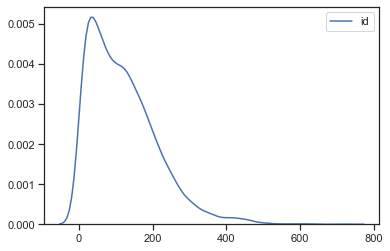

In [20]:
#Distribution of number of songs by artist
sns.kdeplot(songfeat.groupby('artist').count()['id']);

In [21]:
print("Median: " + str(songfeat.groupby('artist').count()['id'].median()))
print("Mean: " + str(songfeat.groupby('artist').count()['id'].mean()))

Median: 104.0
Mean: 120.38484565014032


In [22]:
#Let's look at Charli XCX, who has a number of song around the median
charli = songfeat[songfeat['artist'] == 'Charli XCX']
len(songfeat[songfeat['artist'] == 'Charli XCX'])

93

In [34]:
charli

,album,track_number,id,name,uri,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
569089,Charli,1,7a6HVxpLhW7hRL9JcFZl16,Next Level Charli,spotify:track:7a6HVxpLhW7hRL9JcFZl16,2019-09-13,0.096100,0.536,0.847,0.000000,0.0837,-3.421,0.0323,150.043,0.2150,66,Charli XCX
569090,Charli,2,1yUJK3qxPiFiPeAG2gLfuW,Gone,spotify:track:1yUJK3qxPiFiPeAG2gLfuW,2019-09-13,0.041400,0.910,0.441,0.000009,0.0745,-7.575,0.0693,114.002,0.6600,67,Charli XCX
569091,Charli,3,15IgHEkeO9gSqrKilaEh8b,Cross You Out (feat. Sky Ferreira),spotify:track:15IgHEkeO9gSqrKilaEh8b,2019-09-13,0.007490,0.604,0.492,0.000000,0.1100,-5.207,0.0288,121.125,0.3850,63,Charli XCX
569092,Charli,4,3WGJSY8JaGliVIJyMig5aS,1999,spotify:track:3WGJSY8JaGliVIJyMig5aS,2019-09-13,0.018300,0.745,0.728,0.000002,0.1400,-4.686,0.0340,124.016,0.6250,68,Charli XCX
569093,Charli,5,3B0K8G7WESjdKxQvVMByR9,Click (feat. Kim Petras and Tommy Cash),spotify:track:3B0K8G7WESjdKxQvVMByR9,2019-09-13,0.546000,0.677,0.781,0.000000,0.1820,-5.722,0.1980,135.047,0.5290,65,Charli XCX
569094,Charli,6,2xHEAdEalJ5YcP0ur8kF6L,Warm (feat. HAIM),spotify:track:2xHEAdEalJ5YcP0ur8kF6L,2019-09-13,0.406000,0.518,0.580,0.001700,0.1090,-8.213,0.0871,117.501,0.3960,62,Charli XCX
569095,Charli,7,7A32ilnCkeWlDNM0xsBUfw,Thoughts,spotify:track:7A32ilnCkeWlDNM0xsBUfw,2019-09-13,0.173000,0.492,0.696,0.000000,0.1810,-3.781,0.0292,119.782,0.1570,61,Charli XCX
569096,Charli,8,2RCUr24WkEe2r5Vv4oDKlN,Blame It on Your Love (feat. Lizzo),spotify:track:2RCUr24WkEe2r5Vv4oDKlN,2019-09-13,0.026200,0.717,0.755,0.000000,0.2940,-2.673,0.0481,100.022,0.5980,69,Charli XCX
569097,Charli,9,7fOFeVSyL18q7RiU6cnhiM,White Mercedes,spotify:track:7fOFeVSyL18q7RiU6cnhiM,2019-09-13,0.039200,0.743,0.544,0.000000,0.0672,-5.737,0.0372,129.979,0.1990,72,Charli XCX
569098,Charli,10,25x38hVatSDa5ptfbKwdn5,Silver Cross,spotify:track:25x38hVatSDa5ptfbKwdn5,2019-09-13,0.298000,0.597,0.835,0.000000,0.1780,-5.112,0.0363,134.967,0.6230,63,Charli XCX


In [23]:
charli.columns

Index(['album', 'track_number', 'id', 'name', 'uri', 'release_date',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'artist'],
      dtype='object')

/Users/linhchau/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/linhchau/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


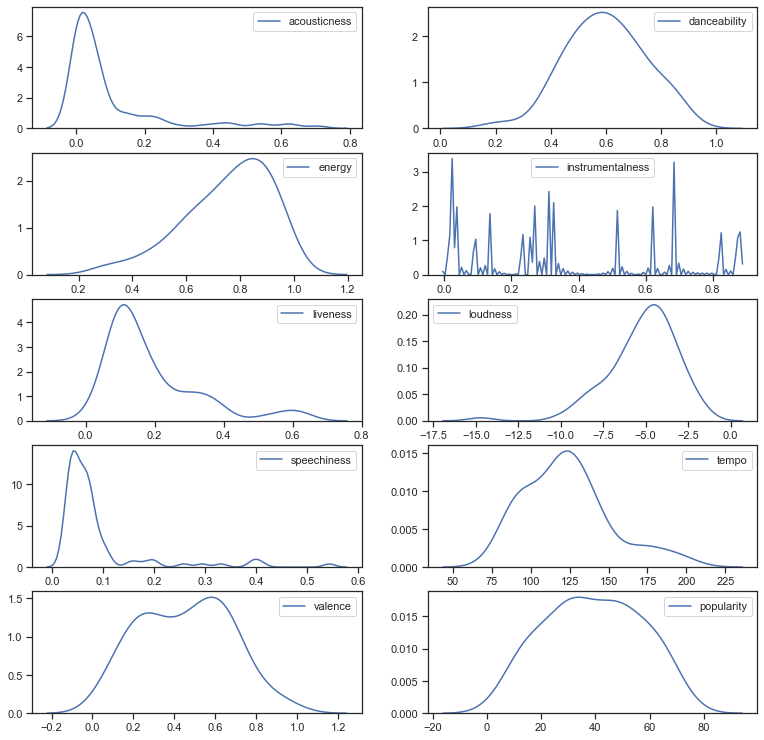

In [24]:
fig, axes = plt.subplots(5,2, figsize = (13,13))

measures = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']


for measure, ax in zip(measures, axes.flat):
    sns.kdeplot(charli[measure], ax=ax)

In [30]:
charli.groupby('artist').mean()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
artist,,,,,,,,,,,
Charli XCX,7.870968,0.100697,0.599,0.751935,0.074973,0.189707,-5.171783,0.087792,123.30638,0.453601,39.107527


In [32]:
charli.groupby('artist').median()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
artist,,,,,,,,,,,
Charli XCX,7,0.0414,0.598,0.777,0.000102,0.134,-4.8555,0.05955,121.5515,0.4795,37


In [25]:
# Let's look at someone in another genre
patty = songfeat[songfeat['artist'] == 'Patty Smyth']
patty

,album,track_number,id,name,uri,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
257060,Come on December,1,2ABycYhsk3i6WdaaOxsvSQ,Come on December,spotify:track:2ABycYhsk3i6WdaaOxsvSQ,2015-11-20,0.01900,0.601,0.807,0.000000,0.0775,-7.351,0.0323,133.985,0.6410,14,Patty Smyth
257061,Come on December,2,0x8fY0S6C3cVFVwJVKfTtY,Have Yourself a Merry Little Christmas,spotify:track:0x8fY0S6C3cVFVwJVKfTtY,2015-11-20,0.15600,0.523,0.401,0.000000,0.0998,-9.382,0.0256,68.006,0.3460,9,Patty Smyth
257062,Come on December,3,2LkGvQmYhEeeAoX1oUjmMu,Walk With Me,spotify:track:2LkGvQmYhEeeAoX1oUjmMu,2015-11-20,0.71200,0.691,0.308,0.000000,0.1100,-10.451,0.0265,104.988,0.3830,10,Patty Smyth
257063,Come on December,4,7lQIeA8zQ0pR7OUdZVSaYy,Winter Wonderland,spotify:track:7lQIeA8zQ0pR7OUdZVSaYy,2015-11-20,0.76500,0.604,0.245,0.000000,0.0841,-9.352,0.0352,94.712,0.2860,8,Patty Smyth
257064,Come on December,5,545BlOcBQ6Wg2MvxtJh3Cv,The Christmas Song,spotify:track:545BlOcBQ6Wg2MvxtJh3Cv,2015-11-20,0.57600,0.348,0.241,0.000000,0.1020,-10.030,0.0342,82.790,0.3470,8,Patty Smyth
257065,Come on December,6,4ULbnMnyHD2IEY3ndkF1kQ,Do You Hear What I Hear,spotify:track:4ULbnMnyHD2IEY3ndkF1kQ,2015-11-20,0.21900,0.492,0.330,0.000000,0.1510,-9.206,0.0274,160.060,0.1000,8,Patty Smyth
257066,Come on December,7,2nwlzWke1R03B8vBVwNO9f,Broken,spotify:track:2nwlzWke1R03B8vBVwNO9f,2015-11-20,0.88000,0.649,0.238,0.000000,0.1330,-10.229,0.0359,122.172,0.5240,10,Patty Smyth
257067,Come on December,8,6rk6IDqL9OufttQek3aLi9,Auld Lang Syne,spotify:track:6rk6IDqL9OufttQek3aLi9,2015-11-20,0.75400,0.285,0.216,0.000000,0.1350,-10.199,0.0332,77.251,0.2330,9,Patty Smyth
257068,Patty Smyth,1,1Ak9nTnQiO4o6CdNWhk7gq,No Mistakes,spotify:track:1Ak9nTnQiO4o6CdNWhk7gq,1992-01-01,0.03840,0.692,0.585,0.000001,0.1660,-9.010,0.0271,111.353,0.5590,21,Patty Smyth
257069,Patty Smyth,2,4PiN286cpTPQbJfHXArM8u,Too Much Love,spotify:track:4PiN286cpTPQbJfHXArM8u,1992-01-01,0.03720,0.619,0.917,0.000003,0.4530,-8.531,0.0559,106.206,0.7060,8,Patty Smyth


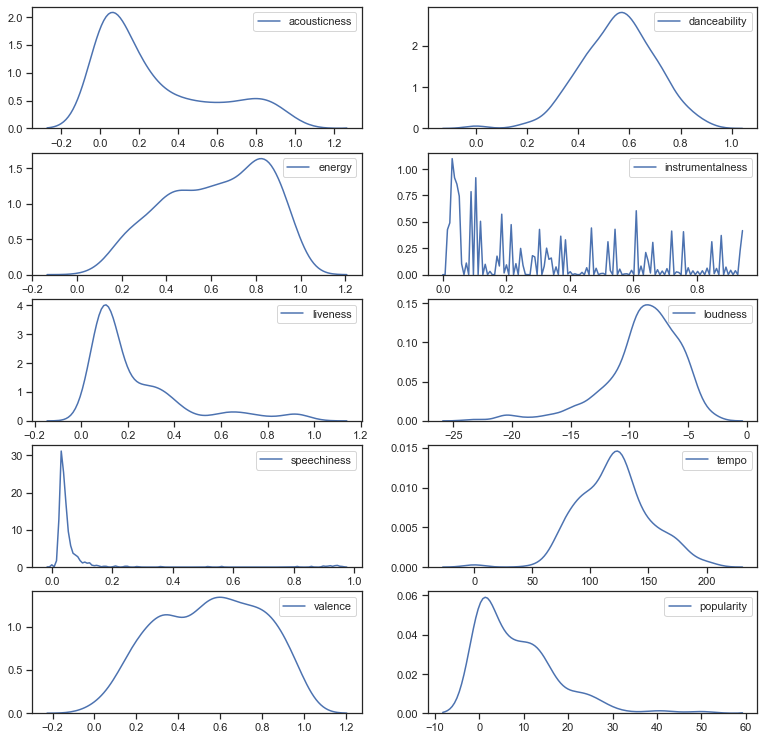

In [26]:
fig, axes = plt.subplots(5,2, figsize = (13,13))

measures = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']


for measure, ax in zip(measures, axes.flat):
    sns.kdeplot(patty[measure], ax=ax)

In [31]:
patty.groupby('artist').mean()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
artist,,,,,,,,,,,
Patty Smyth,10.183932,0.280792,0.556372,0.619886,0.028417,0.232415,-8.862368,0.073263,120.33189,0.550356,8.5074


In [33]:
patty.groupby('artist').median()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
artist,,,,,,,,,,,
Patty Smyth,9,0.161,0.563,0.65,0.000007,0.137,-8.449,0.0388,120.921,0.563,6


# Aggregating the data by artists

In [35]:
songfeat.groupby('artist').mean()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
artist,,,,,,,,,,,
!!! (Chk Chk Chk),5.881818,0.082692,0.746218,0.774124,2.808613e-01,0.178466,-7.689427,0.078385,120.291973,0.613115,22.372727
(Sandy) Alex G,7.989130,0.436583,0.518501,0.507272,4.076341e-01,0.160320,-9.047859,0.039868,120.990370,0.411405,37.695652
070 Shake,1.882353,0.287187,0.693765,0.504647,9.187244e-03,0.166871,-8.579529,0.101606,120.564647,0.298753,46.588235
10,13.710345,0.084700,0.449262,0.786959,8.898089e-02,0.198222,-5.912359,0.064057,126.756345,0.391372,23.531034
112,9.117188,0.235635,0.621328,0.537148,3.034816e-04,0.170666,-8.399313,0.081848,110.526211,0.542398,23.585938
12th Planet,3.413043,0.006144,0.562826,0.928348,2.344230e-01,0.272111,-2.725152,0.213448,127.152543,0.235948,27.478261
1349,10.784615,0.046970,0.254826,0.864070,4.812508e-01,0.350721,-7.405485,0.105506,120.060192,0.162683,9.584615
1964 The Tribute,12.365854,0.072593,0.496805,0.604732,4.224634e-02,0.470163,-9.935341,0.036434,134.004268,0.758854,0.731707
1TakeJay,6.274725,0.170140,0.781945,0.587956,4.899748e-04,0.153275,-8.640934,0.314367,113.524462,0.413996,30.461538


In [36]:
songfeat.groupby('artist').median()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
artist,,,,,,,,,,,
!!! (Chk Chk Chk),6.0,0.024050,0.7540,0.7955,1.575000e-01,0.1115,-7.4320,0.05695,120.0215,0.6570,23.5
(Sandy) Alex G,8.0,0.379500,0.5245,0.4740,3.650000e-01,0.1220,-9.2330,0.03300,113.3340,0.3930,36.0
070 Shake,1.0,0.211000,0.7040,0.4960,0.000000e+00,0.1440,-7.9700,0.04890,121.9320,0.2980,47.0
10,10.0,0.001770,0.4530,0.8350,6.960000e-04,0.1280,-5.1710,0.04850,126.7310,0.3680,24.0
112,9.0,0.170500,0.6410,0.5250,0.000000e+00,0.1290,-8.0170,0.04705,104.9605,0.5290,23.0
12th Planet,3.0,0.001700,0.5580,0.9515,2.685000e-02,0.1945,-2.5995,0.20350,143.0350,0.1550,25.0
1349,8.0,0.000085,0.2210,0.9485,6.245000e-01,0.2770,-6.6615,0.08930,116.0990,0.1115,9.0
1964 The Tribute,11.0,0.004680,0.5130,0.5950,1.500000e-04,0.4770,-10.4240,0.03250,134.6840,0.7940,1.0
1TakeJay,6.0,0.071800,0.8010,0.5980,0.000000e+00,0.1200,-8.3270,0.29500,101.9850,0.3780,31.0


In [37]:
songfeat.groupby('artist').mean().to_csv('songfeatures_filteragg_mean.csv')
songfeat.groupby('artist').median().to_csv('songfeatures_filteragg_median.csv')